<a href="https://colab.research.google.com/github/tmor8832/C-Project/blob/main/Tweet_Coordinates_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
#This code will extract tweets from a user for analysis. Initial rough guide was followed from youtube https://www.youtube.com/watch?v=ujId4ipkBio
#With significant editing

In [77]:
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-j_05s9gt
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-j_05s9gt


In [138]:
#import the relevant libraries
# guidance for geopandas in this video https://www.youtube.com/watch?v=5G-1k4CNChI
import tweepy #used to access twitter API
from textblob import TextBlob #used for common NLP tasks and analysis
from wordcloud import WordCloud #for generating a wordcloud image
import pandas as pd #used for creating dataframes
import numpy as np #arrays etc
import seaborn as sns #graphical library
import itertools #
import collections
import re 
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd 
import plotly.express as px



In [79]:
from google.colab import files
files.upload()

Saving login.csv to login (1).csv


{'login.csv': b"key\r\ne1skulGTffD4riROKn5n5RFUk\r\njdeWlPuH49YR1MZLP4mhWDSO29sKbubz3UGKnoDZs0hX6pamU4\r\n1280139097068183552-hIOsTeLEU9iX6iXqI1EWLvrhjCgpIW'\r\n1280139097068183552-hIOsTeLEU9iX6iXqI1EWLvrhjCgpIW\r\nln0YCbQgntyEx41eqfh20v2n5a5KsIu4cFVgeBsgRBQi1"}

In [139]:
#Extract the data from the CSV file and store as variables
log = pd.read_csv('login.csv')
ConsumerKey = log['key'][0]
ConsumerKeySecret = log['key'][1]
AccessToken = log['key'][3]
AccessTokenSecret = log['key'][4]

In [154]:
#Create the authentication object
authenticate = tweepy.OAuthHandler(ConsumerKey, ConsumerKeySecret)
authenticate.set_access_token(AccessToken, AccessTokenSecret)
api = tweepy.API(authenticate) #wait_on_rate_limit= True)

In [157]:
#Gather 2000 tweets on Bitcoin and filter out any retweets
search_term = '#Bitcoin -filter:retweets'
#create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang = 'en', since='2021-11-20').items(1000) #for 2000 tweets
tweet_coordinates = tweepy.Cursor(api.search, q=search_term, lang = 'en', since='2021-11-20').items(1000)

#store the tweets in a variable
all_tweets = [tweet.text for tweet in tweets]
users_locs = [tweet.user.location for tweet in tweet_loc]

print(coordinates)

combined_information = {'Tweets': all_tweets }

df = pd.DataFrame(combined_information)

df.head()

TweepError: ignored

In [143]:
search_words = "#coronavirus OR #covid19 OR #lockdown"
#tweets = tweepy.Cursor(api.search, q = search_words, lang ='en', geocode='51.507218,-0.127586,100km').items(800)
#make sure there are no spaces between the long and lat and take geocode from
#https://developers.google.com/maps/documentation/geocoding/overview#place-id
tweet_coordinates = tweepy.Cursor(api.search, q = search_words, lang ='en', geocode='51.507218,-0.127586,1000km').items(2000)

In [144]:
latitude= []
longitude = []
for tweet in tweet_coordinates:
  if str(tweet.coordinates) != 'None':
    s = str(tweet.coordinates) 
    print(tweet.coordinates)
    result = s[s.find('[')+1:s.find(']')]
    print(result)
    lat, lng = result.split(',')
    latitude.append(lat)
    longitude.append(lng)
    print(lat)
    print(lng)
  else:
    lat = 0.0
    lng = 0.0
    latitude.append(lat)
    longitude.append(lng)

combined_information = {'Tweets': all_tweets, 'Location': users_locs, 'Longitude': longitude, 'Latitude': latitude }

df = pd.DataFrame(combined_information)

df.head()


TweepError: ignored

In [132]:
df_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Latitude, df.Longitude))


      Longitude     Latitude                   geometry
0     51.562662  -0.17988195  POINT (-0.17988 51.56266)
1   51.50538967  -0.12485951  POINT (-0.12486 51.50539)


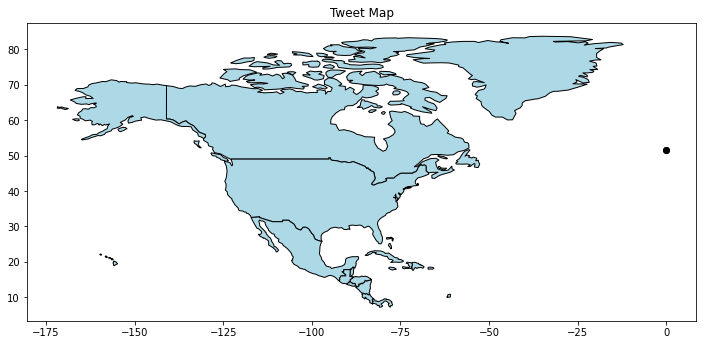

In [151]:
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
axis = world_data[world_data.continent == 'North America'].plot(color = 'lightblue', edgecolor = 'black')
df_geo.plot(ax=axis, color = 'black')
plt.title('Tweet Map')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12,9)
fig.savefig('matplot.png', dpi = 200)
plt.show()

In [ ]:
#Clean the tweets to remove unwanted characters and data
def cleanTweet (tweet):
  tweet = re.sub('#bitcoin', 'bitcoin', tweet) #Remove hashtag from bitcoin or Bitcoin
  tweet = re.sub('#Bitcoin', 'Bitcoin', tweet)
  tweet = re.sub('#[A-Za-z0-9]+', '', tweet) #Remove any strings with a hashtag
  tweet = re.sub('@[A-Za-z0-9]+', '', tweet) #Remove any strings with a hashtag
  tweet = re.sub('$[A-Za-z0-9]+', '', tweet) #Remove any strings with a hashtag
  tweet = re.sub('[!,*)@#%(&$_?.^]', '', tweet)
  tweet = re.sub('\\n', '', tweet) #removing the '\n' string
  tweet = re.sub('https', '', tweet) #remove any hyperlinks
  tweet = re.sub('http', '', tweet) #remove any hyperlinks
  return tweet

def cleanLoc (user_locs):
  str(user_locs)
  if user_locs != "":
    return user_locs
  else:
    user_locs = 'Unknown'
    return user_locs


In [ ]:
#Call the function and clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTweet)
df.head()

In [ ]:
clean_tweet_list = [cleanTweet(tweet) for tweet in all_tweets]
words_in_tweet = [tweet.lower().split() for tweet in clean_tweet_list]
words_in_tweet[:2]

In [ ]:
clean_tweet_list = list(itertools.chain(*words_in_tweet))

# Create counter
count = collections.Counter(clean_tweet_list)

count.most_common(15)

In [ ]:
clean_tweet_list = pd.DataFrame(count.most_common(15),
                             columns=['words', 'count'])

clean_tweet_list.head()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweet_list.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [ ]:
# # Use of textblob NLTK lib https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524
# #create a function to get the subjectivity, values between 0 and 1 where 1 is a high degree of personal opinion and not fact
# def getSubjectivity(tweet):
#   return TextBlob(tweet).sentiment.subjectivity
# #create a function to get the polarity, values bwteen [-1:1] -1 is negative, 1 is a positive sentiment
# def getPolarity(tweet):
#   return TextBlob(tweet).sentiment.polarity 

In [ ]:
# df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
# df['Polarity'] = df['Tweets'].apply(getPolarity)
# df.head(100)

In [ ]:
#create a function to get the sentiment text
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive' 

In [ ]:
#create a column to store the text sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)

In [ ]:
#print positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range (0, sortedDF.shape[0]):
  if (sortedDF['Sentiment'][i]=='Positive'):
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j = j+1



In [ ]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment analysis bar chart')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity (objective ---> subjective)')
plt.show()


In [ ]:
#Plot a word cloud
allWords = ''.join([twts for twts in df['Tweets']])
wordcloud = WordCloud(width = 500, height = 300, random_state= 21, max_font_size=119).generate(allWords)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()